## Example of Training a Neural Network

We will be training a neural network using a modified version of the VAE network. By elmininating the term on the loss function and setting epsilon equal to zero, we arrive at an autoencoder framework that reconstructs hand-written digits. 

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt 
# from VAE import VAE
% matplotlib inline

In [2]:
digits = sklearn.datasets.load_digits()

In [3]:
import numpy as np

class VAE(object):

    def __init__(self, input_dim, output_dim, params):

        # initialize size of VAE 
        self.encoder_layer_sizes = input_dim + [2]
        self.decoder_layer_sizes = [2] + output_dim[::-1] 
        self.total_layer_sizes   = input_dim + [2] + output_dim[::-1]
       
        self.number_encoder_layers = len(self.encoder_layer_sizes) - 1
        self.number_decoder_layers = len(self.decoder_layer_sizes) - 1
        self.number_total_layers   = len(self.total_layer_sizes) - 1

        # intialize weights
        self.encoder_weights = {}
        for i in range(self.number_encoder_layers):
            self.encoder_weights[i] = np.random.uniform(-0.1, 0.1, 
                                                        (self.encoder_layer_sizes[i], 
                                                         self.encoder_layer_sizes[i+1])) 
        self.decoder_weights = {}
        for i in range(self.number_decoder_layers):
            self.decoder_weights[i] = np.random.uniform(-0.1, 0.1, 
                                                        (self.decoder_layer_sizes[i],
                                                         self.decoder_layer_sizes[i+1]))
        # set params
        self.alpha = params['alpha']
        #self.activation = params['activation']
        #self.loss = params['loss']
        self.max_iter = params['max_iter']

    def train(self, train_data):
        '''train the VAE model'''
        count = 0
        while count < self.max_iter:   
            
            # feed forward network
            yhat = self.feedforward(train_data)
            
            # backpropogate errors
            grad_encoder, grad_decoder = self.backprop(train_data, yhat)
        
            # update weights with gradient descent
            for i in range(self.number_decoder_layers):
                self.decoder_weights[i] -= self.alpha * grad_decoder[i]
                
            for i in range(self.number_encoder_layers):
                self.encoder_weights[i] -= self.alpha * grad_encoder[i]
                
            count += 1
            
        return yhat

    def predict_(self):
        '''predicts on a trained VAE model'''        
        
        # sample from latent variable space
        
        # feedforward on decoder
        
        pass

    def backprop(self, y, yhat):
        '''back-propagation algorithm'''
        # initialize 
        grad_decoder = {}
        grad_encoder = {}
        
        # backpropogate error through decoder layers
        delta = - self.grad_loss(y, yhat) * self.grad_activation(self.decoder_input[1])
        grad_decoder[1] = self.decoder_activation[0].T @ delta
        
        delta = delta @ self.decoder_weights[1].T * self.grad_activation(self.decoder_input[0])
        grad_decoder[0] = self.encoder_activation[1].T @ delta 
        
        # backpropogate errors through encoder layers
        delta = delta @ self.decoder_weights[0].T * self.grad_activation(self.encoder_input[1])
        grad_encoder[1] = self.encoder_activation[0].T @ delta
        
        delta = delta @ self.encoder_weights[1].T * self.grad_activation(self.encoder_input[0])
        grad_encoder[0] = y.T @ delta
        
        return grad_encoder, grad_decoder
    
    def activation(self, x):
        '''activation function'''
        return 1 / (1 + np.exp(-x))
    
    def grad_activation(self, x):
        '''derivative of the activation function'''
        return np.exp(-x) / (1 + np.exp(-x))**2
    
    def loss(self, x, y):
        '''loss function'''
        return 0.5 * np.sum((x - y)**2)
    
    def grad_loss(self, x, y):
        '''gradient of loss function'''
        return x - y   
            
    def feedforward(self, train_data):
        '''feedforward update step'''
        # initialize storage for activations
        self.encoder_input = {}
        self.encoder_activation = {}
        self.decoder_input = {}
        self.decoder_activation = {}
        
        self.encoder_input[0]      = train_data @ self.encoder_weights[0]
        self.encoder_activation[0] = self.activation(self.encoder_input[0])
            
        # feedforward update on encoder network
        for i in range(1, self.number_encoder_layers):
            self.encoder_input[i] = self.encoder_input[i-1] @ self.encoder_weights[i]
            self.encoder_activation[i] = self.activation(self.encoder_input[i])
        
        # store output as encoded latent variable parameters
        self.mu = self.encoder_activation[i][0]
        self.sigma = self.encoder_activation[i][1]
        
        # sample latent variable using reparameterization trick
        
        # feedforward update on the decoder network
        self.decoder_input[0]      = self.encoder_activation[i] @ self.decoder_weights[0]
        self.decoder_activation[0] = self.activation(self.decoder_input[0])
        
        for i in range(1, self.number_decoder_layers):
            self.decoder_input[i] = self.decoder_input[i-1] @ self.decoder_weights[i]
            self.decoder_activation[i] = self.activation(self.decoder_input[i])
            
        # output activation
        self.output = self.decoder_activation[i]

        return self.output

After we import the VAE class, we set up the parameters and intialize the weights.  

In [4]:
params = {
    'alpha' : 0.1,
    'activation' : 1,
    'loss' : 1,
    'max_iter' : 100
}

example = VAE([64, 20], [64, 20], params)

### Training on Digits

Here we pass in two training digits of size 8 by 8 pixels.

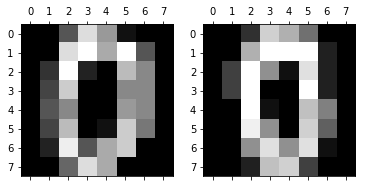

In [5]:
in_digit = np.array((digits.data[0], digits.data[20])) / 256
fig, ax = plt.subplots(1,2)
ax[0].matshow(in_digit[0].reshape((8,8)), cmap = 'gray')
ax[1].matshow(in_digit[1].reshape((8,8)), cmap = 'gray')
pass

We intialize the weights to be random, so the first pass looks jumbled.

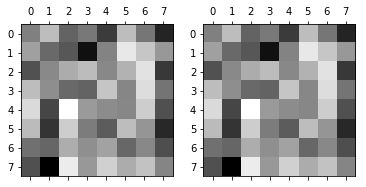

In [6]:
out_digit = example.feedforward(in_digit)
fig, ax = plt.subplots(1,2)
ax[0].matshow(out_digit[0].reshape((8,8)), cmap = 'gray')
ax[1].matshow(out_digit[1].reshape((8,8)), cmap = 'gray')
pass

We then train the network to reduce the loss function and reproduce the images. Here is the images after 50 training iterations.

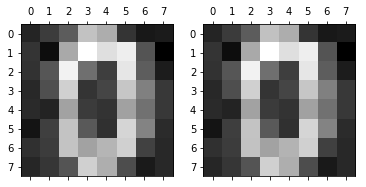

In [7]:
out_trained = example.train(in_digit)
fig, ax = plt.subplots(1,2)
ax[0].matshow(out_trained[0].reshape((8,8)), cmap = 'gray')
ax[1].matshow(out_trained[1].reshape((8,8)), cmap = 'gray')
pass